In [2]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv("Rockfall_data/final_balanced_dataset.csv")

In [5]:
df.head()

,location_id,timestamp,precipitation_rate_mm_hr,pore_pressure_kpa,subsurface_displacement_mm,ground_acceleration_g,realtime_water_table_m,cumulative_precip_72hr,cumulative_precip_168hr,ucs_mpa,seismic_zone,pga_g,initial_water_table_m,rockfall_event,3d_surface_coord_x,3d_surface_coord_y,3d_surface_coord_z
0,Zone_A,2025-04-08 12:37:12.259652,0.3159,245.2500,0.0312,0.0005,25.0000,0.3159,0.3159,90.4,IV,0.49,25.0,0,0.0374,0.0359,0.0405
1,Zone_A,2025-04-08 13:37:12.259652,0.0000,245.2500,0.0630,0.0140,25.0000,0.3159,0.3159,90.4,IV,0.49,25.0,0,0.0756,0.0725,0.0819
2,Zone_A,2025-04-08 14:37:12.259652,0.0000,245.2500,0.0958,0.0326,25.0000,0.3159,0.3159,90.4,IV,0.49,25.0,0,0.1150,0.1102,0.1246
3,Zone_A,2025-04-08 15:37:12.259652,0.0000,245.2500,0.1270,0.0001,25.0000,0.3159,0.3159,90.4,IV,0.49,25.0,0,0.1524,0.1460,0.1651
4,Zone_A,2025-04-08 16:37:12.259652,1.8553,246.8067,0.1584,0.0005,25.1587,2.1712,2.1712,90.4,IV,0.49,25.0,0,0.1900,0.1821,0.2059


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6480 entries, 0 to 6479
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   location_id                 6480 non-null   object 
 1   timestamp                   6480 non-null   object 
 2   3d_surface_coord_x          6480 non-null   float64
 3   3d_surface_coord_y          6480 non-null   float64
 4   3d_surface_coord_z          6480 non-null   float64
 5   pore_pressure_kpa           6480 non-null   float64
 6   subsurface_displacement_mm  6480 non-null   float64
 7   precipitation_rate_mm_hr    6480 non-null   float64
 8   ground_acceleration_g       6480 non-null   float64
 9   realtime_water_table_m      6480 non-null   float64
 10  rockfall_event              6480 non-null   int64  
 11  ucs_mpa                     6480 non-null   float64
 12  seismic_zone                6480 non-null   object 
 13  pga_g                       6480 

,3d_surface_coord_x,3d_surface_coord_y,3d_surface_coord_z,pore_pressure_kpa,subsurface_displacement_mm,precipitation_rate_mm_hr,ground_acceleration_g,realtime_water_table_m,rockfall_event,ucs_mpa,pga_g,initial_water_table_m
count,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000
mean,2.140003,2.139342,2.408683,994.061867,1.784423,5.113998,0.007106,101.336435,0.000154,99.166667,0.270000,27.533333
std,1.442729,1.444576,1.627862,131.568661,1.198351,3.658482,0.008116,13.408245,0.012423,16.590701,0.072577,7.230742
min,0.001000,0.001000,0.001000,176.660000,0.000000,0.000000,0.000000,18.010000,0.000000,77.100000,0.170000,17.600000
25%,0.996000,0.994000,1.113000,973.215000,0.828750,2.117500,0.000000,99.210000,0.000000,77.100000,0.170000,17.600000
50%,2.037500,2.050000,2.310500,1024.150000,1.713500,4.905000,0.005150,104.405000,0.000000,103.300000,0.300000,30.400000
75%,3.128250,3.123000,3.526000,1066.832500,2.614250,7.650000,0.011900,108.750000,0.000000,117.100000,0.340000,34.600000
max,8.262000,8.291000,9.513000,1199.560000,6.386000,19.990000,0.207700,122.280000,1.000000,117.100000,0.340000,34.600000


In [6]:
print('Missing values per column:')
print(df.isnull().sum())
df = df.drop_duplicates()
for col in df.columns:
    if df[col].dtype == 'O':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())
print('Missing values after cleaning:')
print(df.isnull().sum())

Missing values per column:
location_id                   0
timestamp                     0
3d_surface_coord_x            0
3d_surface_coord_y            0
3d_surface_coord_z            0
pore_pressure_kpa             0
subsurface_displacement_mm    0
precipitation_rate_mm_hr      0
ground_acceleration_g         0
realtime_water_table_m        0
rockfall_event                0
ucs_mpa                       0
seismic_zone                  0
pga_g                         0
initial_water_table_m         0
dtype: int64
Missing values after cleaning:
location_id                   0
timestamp                     0
3d_surface_coord_x            0
3d_surface_coord_y            0
3d_surface_coord_z            0
pore_pressure_kpa             0
subsurface_displacement_mm    0
precipitation_rate_mm_hr      0
ground_acceleration_g         0
realtime_water_table_m        0
rockfall_event                0
ucs_mpa                       0
seismic_zone                  0
pga_g                         0
i

In [ ]:
## Data Cleaning Completed


In [11]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Train shape: {X_train.shape}, Test shape: {X_test.shape}')

Train shape: (5184, 14), Test shape: (1296, 14)


In [13]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
X_encoded = X.copy()
for col in X_encoded.select_dtypes(include=['object', 'category']).columns:
    X_encoded[col] = LabelEncoder().fit_transform(X_encoded[col].astype(str))

X_train_enc, X_test_enc = X_encoded.loc[X_train.index], X_encoded.loc[X_test.index]

print('Target unique values:', y_train.unique())
model = xgb.XGBRegressor(random_state=42)
model.fit(X_train_enc, y_train)
y_pred = model.predict(X_test_enc)
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Target unique values: [30.4 17.6 34.6]
MSE: 2.351690555938408e-10
R2 Score: 0.9999999999956546


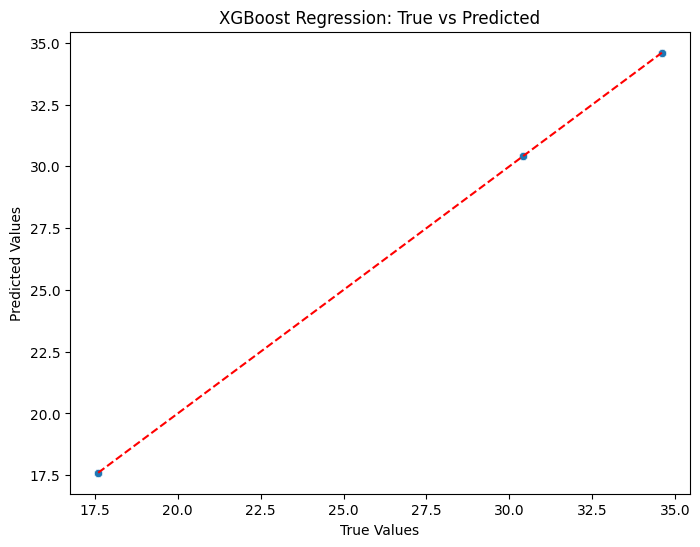

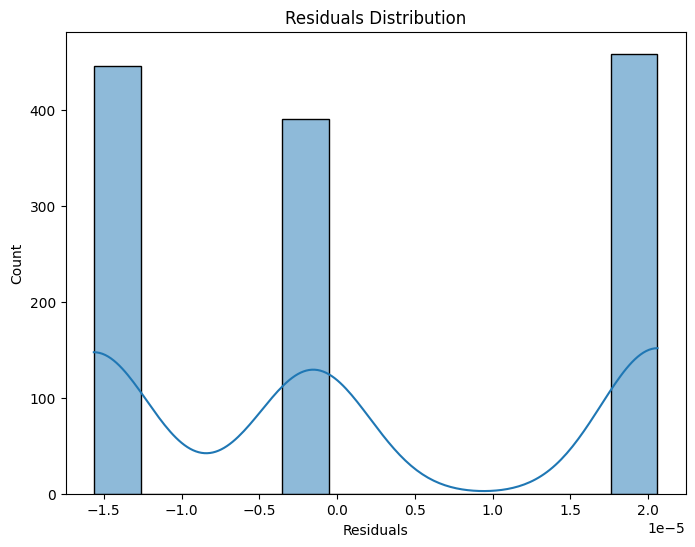

In [16]:
# Test the trained XGBoost regression model
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: True vs Predicted values
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('XGBoost Regression: True vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Residuals Distribution')
plt.show()

In [17]:
# Predict and evaluate on test data (again, for clarity)
y_test_pred = model.predict(X_test_enc)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print(f"Test MAE: {mae:.4f}")
print(f"Test MSE: {mse:.4f}")
print(f"Test R2 Score: {r2:.4f}")

Test MAE: 0.0000
Test MSE: 0.0000
Test R2 Score: 1.0000
